<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/math-and-architectures-of-deep-learning/introduction-to-vectors-matrices-and-tensors/03_orthogonal_matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Orthogonal(Rotation) Matrices

Let's consider an overview of rotation (aka orthogonal) matrices.

Of all transforms, rotation transforms have a special intuitive appeal because of their
highly observable behavior in the mechanical world. 

Furthermore, they play a significant
role in development and analysis of several machine learning tools.

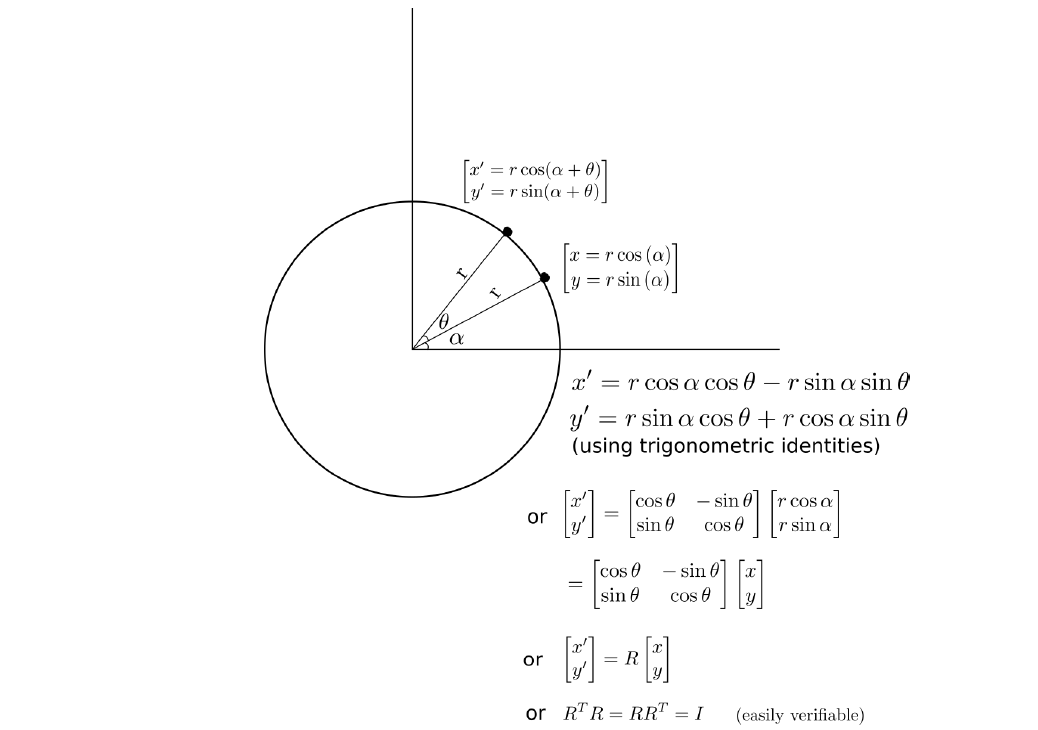


By definition rotation does not change
the distance from the center of rotation, that is what the circle indicates.

Some well known rotation matrices:

* Planar Rotation by angle $\theta$ about Origin:

$$ 
R_{2d} =
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
$$

* Rotation by angle $\theta$ in 3D space about Z axis:

$$ 
R_{3dz} =
\begin{bmatrix}
        cos\theta & -sin\theta & 0 \\
        sin\theta & cos\theta & 0 \\
        0 & 0 & 1 
\end{bmatrix}
$$

Note that the z coordinate remains unaffected by this rotation, viz.,

$$ 
\begin{bmatrix}
        cos\theta & -sin\theta & 0 \\
        sin\theta & cos\theta & 0 \\
        0 & 0 & 1 
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
=
\begin{bmatrix}
        . \\
        . \\
        z 
\end{bmatrix}
$$

* Rotation by angle $\theta$ in 3D space about X axis:

$$ 
R_{3dx} =
\begin{bmatrix}
        1 & 0 & 0 \\
        0 & cos\theta & -sin\theta \\
        0 & sin\theta & cos\theta \\ 
\end{bmatrix}
$$

Note that the X coordinate remains unaffected by this rotation, viz.,

$$ 
\begin{bmatrix}
        1 & 0 & 0 \\
        0 & cos\theta & -sin\theta \\
        0 & sin\theta & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        . \\
        . 
\end{bmatrix}
$$

* Rotation by angle $\theta$ in 3D space about Y axis:

$$ 
R_{3dy} =
\begin{bmatrix}
        cos\theta & 0 & -sin\theta \\
        0 & 1 & 0 \\
        sin\theta & 0 & cos\theta \\ 
\end{bmatrix}
$$

Note that the Y coordinate remains unaffected by this rotation, viz.,

$$ 
\begin{bmatrix}
        cos\theta & 0 & -sin\theta \\
        0 & 1 & 0 \\
        sin\theta & 0 & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
=
\begin{bmatrix}
        . \\
        y \\
        . 
\end{bmatrix}
$$


##Setup

In [15]:
import torch
import torch.linalg as LA

import numpy as np
import math
from math import cos, sin, radians
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
torch.manual_seed(42)

In [3]:
def plot_vector(ax, row_vector, color="cyan"):
  """
  Plot a 3D vector in specified color
  """
  assert len(row_vector == 3)
  v = torch.squeeze(row_vector)
  ax.quiver(0, 0, 0, row_vector[0], row_vector[1], row_vector[2], color=color)

##Rotation matrix

Let us create rotation matrix by angle $\theta$ in 2D and 3D space.

In [4]:
def rotation_matrix_2d(theta):
  """
  Returns the matrix that performs in-plane 2D rotation by angle theta about origin.
  Thus, multiplication with this matrix moves a point to a new location.
  Angle between the position vectors of original and new point is theta
  """
  return torch.tensor([
    [cos(radians(theta)), -sin(radians(theta))],
    [sin(radians(theta)), cos(radians(theta))]
  ])

def rotation_matrix_3d(theta, axis):
  """
  Returns the matrix that will rotate a point in 3D space about the chosen axis by angle theta degrees.
  Axis of rotation, can be 0, 1 or 2 corresponding to x, y or z axis respectively.
  """
  if axis == 0:
    return torch.tensor([
      [1, 0, 0],
      [0, cos(radians(theta)), -sin(radians(theta))],
      [0, sin(radians(theta)), cos(radians(theta))]
    ])
  if axis == 1:
    return torch.tensor([
      [cos(radians(theta)), 0, -sin(radians(theta))],
      [0, 1, 0],
      [sin(radians(theta)), 0, cos(radians(theta))]
    ])
  if axis == 2:
    return torch.tensor([
      [cos(radians(theta)), -sin(radians(theta)), 0],
      [sin(radians(theta)), cos(radians(theta)), 0],
      [0, 0, 1],
    ])

Let us consider the vector `[1, 0, 0]`

In [5]:
u = torch.tensor([1, 0, 0], dtype=torch.float)
# Reshape it to represent a row vector
u = u.reshape((3, 1))
print(f"Original vector: \n{u}\n")

# Rotate it by 30 degrees around Z Axis
angle_of_rotation = 30.0
R = rotation_matrix_3d(angle_of_rotation, 2)
print(f"Rotation matrix for {angle_of_rotation} degrees around Z Axis is:\n{R}\n")

v = torch.matmul(R, u)
print(f"Vector after rotation:\n{v}")

Original vector: 
tensor([[1.],
        [0.],
        [0.]])

Rotation matrix for 30.0 degrees around Z Axis is:
tensor([[ 0.8660, -0.5000,  0.0000],
        [ 0.5000,  0.8660,  0.0000],
        [ 0.0000,  0.0000,  1.0000]])

Vector after rotation:
tensor([[0.8660],
        [0.5000],
        [0.0000]])


Let's computes angle between two vectors.

In [6]:
def get_angle(u, v):
  """
  Computes angle between two vectors using arc cosine
  """
  u = torch.squeeze(u)
  v = torch.squeeze(v)
  assert len(u.shape) == 1 and len(v.shape) == 1

  return math.degrees(math.acos((torch.dot(u, v) / torch.linalg.norm(u) * torch.linalg.norm(v))))

In [7]:
# Angle between u and v
angle_u_v = get_angle(u, v)
print(f"Angle between the two vectors {angle_u_v}")
assert np.allclose(angle_u_v, angle_of_rotation)

Angle between the two vectors 30.000001781168113


Let's apply rotation matrices.

In [8]:
u = np.array([1, 1, 1])

# apply rotation 45 about Z-axis
r3dz = rotation_matrix_3d(45, 2)
v = np.matmul(r3dz, u)
v

tensor([0.0000, 1.4142, 1.0000], dtype=torch.float64)

In [9]:
# apply rotation 45 about X-axis
r3dz = rotation_matrix_3d(45, 0)
v = np.matmul(r3dz, u)
v

tensor([1.0000, 0.0000, 1.4142], dtype=torch.float64)

In [10]:
# apply rotation 45 about Y-axis
r3dz = rotation_matrix_3d(45, 1)
v = np.matmul(r3dz, u)
v

tensor([0.0000, 1.0000, 1.4142], dtype=torch.float64)

Let's plot vectors and curves and surfaces in 3D.

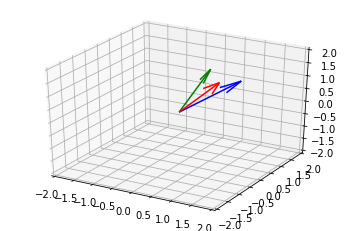

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Let us now visualise the vectors in 3D 
u = torch.tensor([1, 1, 1], dtype=torch.float)

# Reshape to represent as a row vector
u_row = u.reshape((3, 1))
plot_vector(ax, u_row, color="blue")

# Rotate it 45 degrees around Z axis
R = rotation_matrix_3d(45, 2)
v_row = torch.matmul(R, u_row)
plot_vector(ax, v_row, color="green")

# Rotate again by 45 around X axis
R = rotation_matrix_3d(45, 0)
w_row = torch.matmul(R, u_row)
plot_vector(ax, w_row, color="red")

plt.show()

##Orthogonality of rotation matrices

A matrix $R$ is orthogonal if and only if it its transpose is also its inverse, i.e., $R^TR = RR^T =  I$.

All rotations matrices are orthogonal matrices. All orthogonal matrices represent some rotation.

For instance:

$$
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}^T 
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        cos\theta & sin\theta \\
        -sin\theta & cos\theta \\
\end{bmatrix}^T 
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        cos^2\theta + sin^2\theta & 0 \\
        0 & cos^2\theta + sin^2\theta \\
\end{bmatrix}
=
\begin{bmatrix}
        1 & 0 \\
        0 & 1 \\
\end{bmatrix}
=I
$$

**Orthogonality implies rotation is length preserving**

Lengths (magnitudes) of the 2 vectors $x, y$ are equal, since it is easy to see that:

$$
||y|| = y^Ty = (Rx)^T(Rx) = x^TR^TRx = x^TIx = x^Tx = ||x||
$$

Since we know that $(AB)^T = B^TA^T$

In [12]:
R_30 = rotation_matrix_2d(30)
print(f"Matrix to rotate in-plane by 30 degrees about origin:\n{R_30}")

# Inverse of rotation matrix is same as the transpose, this is orthogonality.
assert torch.allclose(torch.linalg.inv(R_30), R_30.T)

# Equivalently, if we multiply a rotation matrix and its transpose, we get the identity matrix.
assert torch.allclose(torch.matmul(R_30, R_30.T), torch.eye(2))

Matrix to rotate in-plane by 30 degrees about origin:
tensor([[ 0.8660, -0.5000],
        [ 0.5000,  0.8660]])


In [13]:
# Let us take a random point (4, 0)
u = torch.tensor([[4], [0]], dtype=torch.float)

# Rotate it by 30 degrees
v = torch.matmul(R_30, u)
print(f"Original vector u:\n{u}")
print(f"Rotated Vector v:\n{v}")

print(f"Length of u: {torch.linalg.norm(u)}")
print(f"Length of v: {torch.linalg.norm(v)}")

# We assert that rotation is length preserving
assert torch.linalg.norm(u) == torch.linalg.norm(v)

Original vector u:
tensor([[4.],
        [0.]])
Rotated Vector v:
tensor([[3.4641],
        [2.0000]])
Length of u: 4.0
Length of v: 4.0


**Negating the angle of rotation is equivalent to inverting the rotation matrix, which is equivalent to transposing the rotation matrix**

For instance, consider in plane rotation. Say a point $x$ is rotated about the origin to vector $y$ via matrix $R$. Thus

$$
R = 
\begin{bmatrix}
        cos\theta & -sin\theta \\
        sin\theta & cos\theta \\
\end{bmatrix}
$$
$$
y = Rx
$$

Now, we can go back from $y$ to $x$ by rotating by $-\theta$.

$$
\begin{bmatrix}
        cos(-\theta) & -sin(-\theta) \\
        sin(-\theta) & cos(-\theta) \\
\end{bmatrix}
=
\begin{bmatrix}
        cos\theta & sin\theta \\
        -sin\theta & cos\theta \\
\end{bmatrix}
= R^T
$$

In other words, $R^T$ inverts the rotation, i.e., rotates by the negative angle.

Let us now negate the rotation i.e rotate the point back by -30 degrees.



In [14]:
R_neg30 = rotation_matrix_2d(-30)
print(f"Matrix to rotate in-plane by -30 degrees about origin:\n{R_neg30}")

# Rotation by negative angle is equivalent to inverse rotation
w = torch.matmul(R_neg30, v)
print(f"Re-Rotated Vector w:\n{w}")

# We assert that this vector is the same as the original vector u
assert torch.all(w == u)

# We also assert that R_neg30 is the transpose and the inverse of R_30
assert torch.allclose(R_30, R_neg30.T)
# Matrix that rotates by an angle is inverse of the matrix that rotates by negative of the same angle
assert torch.allclose(torch.matmul(R_30, R_neg30), torch.eye(2))

Matrix to rotate in-plane by -30 degrees about origin:
tensor([[ 0.8660,  0.5000],
        [-0.5000,  0.8660]])
Re-Rotated Vector w:
tensor([[4.],
        [0.]])


**Eigenvalues and eigenvectors of the rotation matrix: How to find the axis of rotation**

Let $\lambda,  e$ be an eigenvalue, eigenvector pair of a rotation matrix $R$. Then,

$$Re = \lambda e$$

After Transposing both sides,

$$(Re)^T = (\lambda e)^T$$
$$e^TR^T = \lambda e^T$$

Multiplying left and right sides, respectively, with equivalent entities $Re$ and $\lambda e$, we get,

$$e^TR^T(Re) = \lambda e^T(\lambda e)$$
$$e^T(R^TR)e = \lambda^2 e^Te$$
$$e^T(I)e = \lambda^2 e^Te$$
$$e^Te = \lambda^2 e^Te$$
$$ \lambda^2 = 1$$
$$ \lambda = 1$$

(the negative solution $\lambda = -1$ corresponds to reflection).

Thus, all rotation matrices
will have 1 as one of its eigenvalues. The corresponding eigenvector $e$ satisfies $Re = e$.

This is the axis of rotation - the set of points that stay where they were post rotation.

Let us now compute the eigen values and eigen vectors of the rotation matrix.






In [16]:
# Matrix for rotation by 45 degrees about origin
R = torch.tensor([
  [0.7071, 0.7071, 0], 
  [-0.7071, 0.7071, 0],
  [0, 0, 1]
])

# As seen in the previous section, A is a rotation matrix around the Z axis
l, e = LA.eig(R)

We know that all rotation matrices will have 1 as one of its eigenvalues.

The eigen vector corresponding to that value is the axis of rotation.

In [20]:
# torch.where returns the indices where the specified condition is satisfied
axis_of_rotation = e[:, torch.where(l == 1.0)]

# torch.squeeze is used to remove dimensions of size 1
axis_of_rotation = torch.squeeze(axis_of_rotation)
print(f"Axis of rotation is: {axis_of_rotation}")

# axis of rotation is the Z-axis
assert np.allclose(axis_of_rotation, np.array([0, 0, 1]))

# Let us take a random point on the axis of rotation
p = torch.randint(0, 10, (1, )) * axis_of_rotation  
print(f"Point of axis of rotation: {p}")

Axis of rotation is: tensor([0.+0.j, 0.+0.j, 1.+0.j])
Point of axis of rotation: tensor([0.+0.j, 0.+0.j, 7.+0.j])


Point on the axis of rotation remain unchanged even after rotation. 

Thus vector p and its transform $Rp$ are close.

In [18]:
assert torch.allclose(torch.matmul(R, p.real), p.real)